# Predicting Survival in the Titanic Data Set

###  We will be using a decision tree to make predictions about the Titanic data set from Kaggle. This data set provides information on the Titanic passengers and can be used to predict whether a passenger survived or not.

# Loading Data and modules

In [102]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report


titanic = pd.read_csv("F:/dataset/train(1).csv")
#titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']


In [103]:
titanic=pd.DataFrame(data=titanic,columns=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked'])

In [104]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,NaN
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,NaN
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,NaN
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,NaN


In [105]:
titanic=titanic.drop(titanic[['PassengerId','Name','Ticket','E mbarked','Cabin']],axis=1)

In [106]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,3,male,22.0,1,0,7.2500
1,1.0,1,female,38.0,1,0,71.2833
2,1.0,3,female,26.0,0,0,7.9250
3,1.0,1,female,35.0,1,0,53.1000
4,0.0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0.0,2,male,27.0,0,0,13.0000
887,1.0,1,female,19.0,0,0,30.0000
888,0.0,3,female,NaN,1,2,23.4500
889,1.0,1,male,26.0,0,0,30.0000


In [107]:
titanic.Age.fillna(titanic.Age.mode()[0],inplace=True)

In [108]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [109]:
from patsy import dmatrices

In [110]:
y, X = dmatrices('Survived ~ Pclass + Age + Parch + Fare + SibSp  + C(Sex) ',titanic, return_type="dataframe")

In [111]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [112]:
X

,Intercept,C(Sex)[T.male],Pclass,Age,Parch,Fare,SibSp
0,1.0,1.0,3.0,22.0,0.0,7.2500,1.0
1,1.0,0.0,1.0,38.0,0.0,71.2833,1.0
2,1.0,0.0,3.0,26.0,0.0,7.9250,0.0
3,1.0,0.0,1.0,35.0,0.0,53.1000,1.0
4,1.0,1.0,3.0,35.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
886,1.0,1.0,2.0,27.0,0.0,13.0000,0.0
887,1.0,0.0,1.0,19.0,0.0,30.0000,0.0
888,1.0,0.0,3.0,24.0,2.0,23.4500,1.0
889,1.0,1.0,1.0,26.0,0.0,30.0000,0.0


In [113]:
X = X.rename(columns ={'C(Sex)[T.male]':'Male'})

In [114]:
X.columns

Index(['Intercept', 'Male', 'Pclass', 'Age', 'Parch', 'Fare', 'SibSp'], dtype='object')

In [115]:
X=X.drop(X[['Intercept']],axis=1)

In [116]:
X

,Male,Pclass,Age,Parch,Fare,SibSp
0,1.0,3.0,22.0,0.0,7.2500,1.0
1,0.0,1.0,38.0,0.0,71.2833,1.0
2,0.0,3.0,26.0,0.0,7.9250,0.0
3,0.0,1.0,35.0,0.0,53.1000,1.0
4,1.0,3.0,35.0,0.0,8.0500,0.0
...,...,...,...,...,...,...
886,1.0,2.0,27.0,0.0,13.0000,0.0
887,0.0,1.0,19.0,0.0,30.0000,0.0
888,0.0,3.0,24.0,2.0,23.4500,1.0
889,1.0,1.0,26.0,0.0,30.0000,0.0


In [117]:
X.corr()

,Male,Pclass,Age,Parch,Fare,SibSp
Male,1.000000,0.131900,0.073377,-0.245489,-0.182333,-0.114631
Pclass,0.131900,1.000000,-0.356187,0.018443,-0.549500,0.083081
Age,0.073377,-0.356187,1.000000,-0.155118,0.107554,-0.232411
Parch,-0.245489,0.018443,-0.155118,1.000000,0.216225,0.414838
Fare,-0.182333,-0.549500,0.107554,0.216225,1.000000,0.159651
SibSp,-0.114631,0.083081,-0.232411,0.414838,0.159651,1.000000


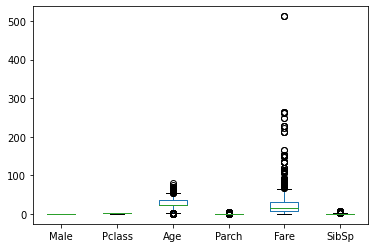

In [118]:
X.plot(kind='box')

In [119]:
from sklearn.tree import DecisionTreeClassifier

In [120]:
model=DecisionTreeClassifier()

In [121]:
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [124]:
model.score(X,y)

0.9809203142536476

In [157]:

titan = pd.read_csv("F:/dataset/test.csv")

In [158]:
titan

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,928.0,"Kelly, Mr. James",19.0,"Unknown, Ireland",Southampton,New York City,NaN,70MB,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1297.0,"Wilkes, Mrs. Ellen",47.0,"Penzance, Cornwall, England",Southampton,"Akron, Ohio, US",16,NaN,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,518.0,"Myles, Mr. Thomas Francis",63.0,"Fermoy, Ireland[note 1]",Queenstown,"Waban, Massachusetts, US",NaN,NaN,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1303.0,"Wirz, Mr. Albert",27.0,"Uster, Switzerland",Southampton,"Beloit, Wisconsin, US",NaN,131MB,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,871.0,"Hirvonen, Mrs. Helga Elisabeth (née Lindqvist)",22.0,"Taalintehdas, Finland",Southampton,"Monessen, Pennsylvania, US",15,NaN,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1227.0,"Spector, Mr. Woolf",23.0,"London, England",Southampton,New York City,NaN,NaN,3.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,229.0,"and maid, Doña Fermina Oliva y Ocana",39.0,"Madrid, Spain",Cherbourg,"New York, New York, US",8,NaN,1.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1169.0,"Sæther, Mr. Simon Sivertsen",43.0,"Skaun, Sør-Trøndelag, Norway",Southampton,US,NaN,32MB,3.0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1289.0,"Ware, Mr. Frederick William",34.0,"Greenwich, London, England",Southampton,New York City,NaN,NaN,3.0


In [159]:
titan=pd.DataFrame(data=titan,columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked'])

In [160]:
titan

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,NaN
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,NaN
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,NaN
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,NaN


In [161]:
titan=titan.drop(titan[['PassengerId','Name','Ticket','E mbarked','Cabin']],axis=1)

In [162]:
titan

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [163]:
tita=pd.get_dummies(titan['Sex'], drop_first=True)

In [164]:
tita

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [165]:
titan=titan.drop(titan[['Sex']],axis=1)

In [166]:
titan

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
...,...,...,...,...,...
413,3,NaN,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,NaN,0,0,8.0500


In [167]:
titan=pd.concat([titan,tita],axis=1)

In [168]:
titan

,Pclass,Age,SibSp,Parch,Fare,male
0,3,34.5,0,0,7.8292,1
1,3,47.0,1,0,7.0000,0
2,2,62.0,0,0,9.6875,1
3,3,27.0,0,0,8.6625,1
4,3,22.0,1,1,12.2875,0
...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,1
414,1,39.0,0,0,108.9000,0
415,3,38.5,0,0,7.2500,1
416,3,NaN,0,0,8.0500,1


In [169]:
titan['Age'].fillna(titan.Age.mode()[0],inplace=True)

In [175]:
titan["Fare"].fillna(titan.Fare.mean(),inplace=True)

In [176]:
model.predict(titan)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.